In [1]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [2]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion',
  'arbeitsbedingungen',
  'weiterbildung',
  'wissenschaftliche aktivitäten',
  'auslandsaufenthalt',
  'gesundheit'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [6]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [7]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [8]:
keywords_within_text[13]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [9]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [10]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [11]:
data['Ground_Truth'][0]

"'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'"

In [12]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [14]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [15]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [16]:
data["clean_text"][11]

'Waren oder sind Sie seit der letzten Befragung im in irgendeiner Form erwerbstätig . Bitte geben Sie mit Hilfe der Zeilennummern an bei welcher Stelle es sich um Ihre aktuelle Stelle handelt . Handelt es sich bei Ihrer letzten beruflichen Station um dieselbe Stelle die Sie zum Zeitpunkt der letzten Befragung im ausgeübt haben . Handelte es sich bei Ihrer letzten Stelle um eine Tätigkeit in der Wissenschaft . Welcher der folgenden Personalkategorien konnten Sie sich zuordnen . Waren Sie zuletzt im öffentlichen Dienst bzw . einem dem öffentlichen Dienst tariflich angeglichenen Arbeitsverhältnis beschäftigt . Wie viele Mitarbeiter innen waren bei Ihrem Arbeitgeber beschäftigt . Welchem Wirtschaftsbereich gehörte der Betrieb bzw . die Einrichtung in dem der Sie arbeiteten schwerpunktmäßig an . Haben Sie zuletzt in einer Position gearbeitet in der ... Haben Sie zuletzt in einer Position gearbeitet in der ... Wie viel Euro pro Jahr erhielten Sie darüber hinaus jährlich in Form von Zulagen .

In [17]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=True))

In [18]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [19]:
data["Clean_Text_Sentences"] = new_clean_text

In [20]:
len(data["Clean_Text_Sentences"][8])

151

In [21]:
Preprocesed_text = []
for i in range(len(data["Clean_Text_Sentences"])):
    Preprocesed_text.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        Preprocesed_text[i].append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["Clean_Text_Sentences"][i][j])) 

In [22]:
Preprocesed_text[10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten. Ich habe. Ich habe das Niveau. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten. Ich habe die Gesamtnote. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Was machen Sie zurzeit genau. Ich studiere in einem Studiengang an einer Hochschule oder Universität. Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang. DSH TestDaF. Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg. Ich warte auf meinen Prüfungstermin

In [23]:
cleaned_text = []
for i in range(len(Preprocesed_text)):
    cleaned_text.append([])
    for j in range(len(Preprocesed_text[i])):
        for line in Preprocesed_text[i][j].split('\n'):
            # Replace multiple dots with space
            line = re.sub('\. \.+', '.', line) 
            # Remove single dots
            cleaned_text[i].append(re.sub('\.', '.', line))

In [24]:
cleaned_text[5]

['Waren oder sind Sie seit der letzten Befragung im in irgendeiner Form erwerbstätig.',
 'Bitte vergeben Sie für jeden Arbeitgeber einen anderen Buchstaben und für denselben Arbeitgeber immer denselben Buchstaben. Bitte auswählen. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Selbständigkeit.',
 'Haben Sie seit eine weitere Tätigkeit ausgeübt.',
 'Bitte vergeben Sie für jeden Arbeitgeber einen anderen Buchstaben und für denselben Arbeitgeber immer denselben Buchstaben. Bitte auswählen. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Selbständigkeit.',
 'Haben Sie seit eine weitere Tätigkeit ausgeübt.',
 'Bitte vergeben Sie für jeden Arbeitgeber einen anderen Buchstaben und für denselben Arbeitgeber immer denselben Buchstaben. Bitte auswählen. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Arbeitgeber. Selbständigkeit.',
 'Haben Si

In [25]:
data["cleaned_text"] = cleaned_text

In [26]:
# #using spacy model for POS tagging
# nlp = spacy.load('de_core_news_lg')
# Extracted_Pos_tags=[]  # can change it to Extracted_Noun
# for i in range(len(cleaned_text)):
#     Extracted_Pos_tags.append([])
#     for j in range(len(cleaned_text[i])):
#         Extracted_Pos_tags[i].append([])
#         doc = nlp(cleaned_text[i][j])
#         for t in doc:
#             tag=t.pos_
#             if t.text not in Extracted_Pos_tags[i][j]:
#                 Extracted_Pos_tags[i][j].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [27]:
# lemmatizer = GermaLemma()
# lemmatized_words = []
# nlp = spacy.load('de_core_news_lg')

# for i in range(len(Extracted_Pos_tags)):
#     lemmatized_words.append([])
#     for j in range(len(Extracted_Pos_tags[i])):
#         lemmatized_words[i].append([])
#         lemma_spacy = nlp(cleaned_text[i][j])
#         for l in range(len(lemma_spacy)):
#             token = lemma_spacy[l]
#             if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
#                 lemmatized_words[i][j].append(token.lemma_)
#             else:
#                 lemmatized_words[i][j].append(lemmatizer.find_lemma(Extracted_Pos_tags[i][j][l][0], Extracted_Pos_tags[i][j][l][1]))

In [28]:
# #lemmatization on POS tagged text using GermaLemma
# clean_text_w_lemma = []
# for i in range(len(data["cleaned_text"])):
#     clean_text_w_lemma.append([])
#     for words in data["cleaned_text"][i]:
#         doc = nlp(words)
#         result = ' '.join([token.lemma_ for token in doc]) 
#         clean_text_w_lemma[i].append(result)

In [29]:
# lemma_sentences = []
# for i in range(len(lemmatized_words)):
#     lemma_sentences.append([])
#     for j in range(len(lemmatized_words[i])):
#         lemma_sentences[i].append(' '.join(lemmatized_words[i][j]))

In [30]:
# data["Lemma_Text_Sentences"] = lemma_sentences

In [31]:
# #Calculating Document Frequency

# from collections import defaultdict
# import math

# DF = {}
# for i in range(len(data["Lemma_Text_Sentences"])):
#     for j in range(len(data["Lemma_Text_Sentences"][i])):
#         tokens = nltk.word_tokenize(data["Lemma_Text_Sentences"][i][j]) #without nltk.word_tokenize, it gives character level DF
#         for w in tokens:
#             try:
#                 DF[w].add(i)
#             except:
#                 DF[w] = {i}
 

In [32]:
# for word,freq in DF.items():
#     print(word,len(freq))

In [33]:
# df_list=[]
# for word,freq in DF.items():
#     df_list.append(tuple((word,len(freq)/19)))

In [34]:
# df_list.sort(key=lambda x:x[1])

In [35]:
# word_counts = [x[1] for x in df_list]

In [36]:
# from collections import Counter
# df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [37]:
# import matplotlib.pyplot as plot
# # Draw a vertical bar chart

# df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

# plot.show(block=True);

In [38]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [39]:
Pos_tags=[]
for i in range(len(data['Ground_Truth'])):
    Pos_tags.append([])
    sw = nlp(data['Ground_Truth'][i])
    for t in sw:
        tag=t.pos
        if t.text not in Pos_tags:
            Pos_tags[i].append((t.text, t.pos_))

In [40]:
Pos_tags

[[("'", 'PUNCT'),
  ('wissenschaftssystem', 'ADJ'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('betreuung', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('wissenschaftliche', 'ADJ'),
  ('karriere', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsformen', 'VERB'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsmotive', 'ADJ'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('vereinbarkeit', 'NOUN'),
  ('von', 'ADP'),
  ('familie', 'NOUN'),
  ('und', 'CCONJ'),
  ('beruf', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('monetäre', 'ADJ'),
  ('erträge', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('nicht-monetäre', 'ADJ'),
  ('erträge', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('wissenschaftlicher', 'ADJ'),
  ('nachwuchs', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsabbruch', 'ADV'),
  ("'", 'PUNCT'),
 

In [41]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [42]:
# Extracted_Pos_tags
# 9 pair of adjective and noun, where adjetive is followed by noun and there one pair where verb is followed by noun.

In [43]:
# from collections import Counter
# word_counts = []
# for i in range(len(Extracted_Pos_tags)):
#     word_counts.append(Counter(Extracted_Pos_tags[i]))

In [44]:
#using the keybert library
from keybert import KeyBERT

In [45]:
kw_model = KeyBERT("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")  #("clips/mfaq") #("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli") 
#clips/mfaq

In [46]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
# # Init default vectorizer.
vectorizer = KeyphraseCountVectorizer(spacy_pipeline='de_core_news_lg', pos_pattern= '((<ART.*>|<AD.*>)*<N.*>+)((<KO.*>|<AP.*>)+((<ART.*>|<AD.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)')

In [47]:
#The default pattern is <J.*>*<N.*>+ which means that it extract keyphrases 
#that have 0 or more adjectives followed by 1 or more nouns.

# only extract a noun: pos_pattern='<N.*>'

In [48]:
# Print parameters
print(vectorizer.get_params())

{'binary': False, 'dtype': <class 'numpy.int64'>, 'lowercase': True, 'max_df': None, 'min_df': None, 'pos_pattern': '((<ART.*>|<AD.*>)*<N.*>+)((<KO.*>|<AP.*>)+((<ART.*>|<AD.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)', 'spacy_pipeline': 'de_core_news_lg', 'stop_words': 'english', 'workers': 1}


In [49]:
# After initializing the vectorizer, it can be fitted
# # to learn the keyphrases from the text documents.
# for i in range(len(cleaned_text)):
#     vectorizer.fit(cleaned_text[i])

In [50]:
for i in range(len(data["cleaned_text"])):
    vectorizer.fit(data["cleaned_text"][i])


In [51]:
# After learning the keyphrases, they can be returned.
keyphrases = []  # keyphrases = []
keyphrases.append(vectorizer.get_feature_names_out())

In [52]:
keyphrases

[array(['mangelndes selbstwertgefühl', 'nährer informationen zu hisbus',
        'des studiums geld', 'partner von der partnerin', 'einkommen',
        'geringere lebenshaltungskosten', 'bessere studienbedingungen',
        'persönliche gründe', 'des studiums', 'den wegfall von leistungen',
        'andere sprache', 'der partnerin kind ern freunden',
        'betarungs und informationsbedarf', 'berufsausbildung', 'bitte',
        'einer zwischenmahlzeit am vormittag', 'des studiengangs',
        'die studiengebühren', 'studienangebot',
        'eine sichere planungsperspektive', 'förderungsbetrag', 'monat',
        'gründe', 'name', 'tätigkeiten gegen bezahlung',
        'den mensen cafeterien',
        'der hochschule einschließlich ortsangabe', 'sonstiges stipendium',
        'der vorlesungsfreien zeit geld', 'der ausbildung', 'finanzierung',
        'art', 'der stipendiengeber', 'kleidungsgeschenke',
        'freizeit kultur und sport', 'geschwister', 'den betrag',
        'der hoch

In [53]:
new_set_keyphrases = []
for i in range(len(data["cleaned_text"])):
    new_set_keyphrases.append(kw_model.extract_keywords(data["cleaned_text"][i], vectorizer=vectorizer,stop_words=stop_words, top_n=15, use_mmr=True, diversity=0.9))
    

/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
503it [00:00, 920.97it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
114it [00:00, 866.91it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory

In [54]:
new_set_keyphrases[0]

[[('ebenfalls interesse', 0.1165),
  ('promotion', 0.2472),
  ('die promotionsbedingungen', 0.2774),
  ('dezember zur promotion', 0.291),
  ('promovierenden', 0.3277),
  ('hochschule', 0.3446),
  ('die hochschule', 0.3475)],
 [('anfang dezember', 0.1354), ('hochschule', 0.1938), ('doktorand', 0.2738)],
 [('hochschule', 0.3264),
  ('eine offiziell der hochschule', 0.3469),
  ('gemeldete unterbrechung', 0.4849)],
 [('quartal', 0.0876), ('den arbeiten', 0.1366)],
 [('quartal', 0.1477)],
 [('promotion', 0.0605), ('hochschule', 0.2032)],
 [('quartal', 0.1553), ('promotion', 0.1928)],
 [('promotionsverfahren', 0.1023),
  ('hochschule', 0.2805),
  ('ausland', 0.3007),
  ('eine hochschule im ausland', 0.4422)],
 [('ausland', 0.044), ('einen gemeinsamen abschluss', 0.4347)],
 [('promotionsverfahren', 0.5), ('eine fachhochschule', 0.7062)],
 [('des saarlandes', 0.2995),
  ('der universität', 0.3173),
  ('den letzten jahren an der universität', 0.6416),
  ('des saarlandes uds als wissenschaftlich

In [55]:
#flattening the list
flatten_list= []
for i in range(len(new_set_keyphrases)):
    flatten_list.append([item for sublist in new_set_keyphrases[i] for item in sublist])

In [56]:
#to remove None Found - for keyphrase vectorizer
for i in range(len(flatten_list)):
    for elm in list(flatten_list[i]):
        if type(elm)!= tuple:
            flatten_list[i].remove(elm)

In [57]:
flatten_list[0]

[('ebenfalls interesse', 0.1165),
 ('promotion', 0.2472),
 ('die promotionsbedingungen', 0.2774),
 ('dezember zur promotion', 0.291),
 ('promovierenden', 0.3277),
 ('hochschule', 0.3446),
 ('die hochschule', 0.3475),
 ('anfang dezember', 0.1354),
 ('hochschule', 0.1938),
 ('doktorand', 0.2738),
 ('hochschule', 0.3264),
 ('eine offiziell der hochschule', 0.3469),
 ('gemeldete unterbrechung', 0.4849),
 ('quartal', 0.0876),
 ('den arbeiten', 0.1366),
 ('quartal', 0.1477),
 ('promotion', 0.0605),
 ('hochschule', 0.2032),
 ('quartal', 0.1553),
 ('promotion', 0.1928),
 ('promotionsverfahren', 0.1023),
 ('hochschule', 0.2805),
 ('ausland', 0.3007),
 ('eine hochschule im ausland', 0.4422),
 ('ausland', 0.044),
 ('einen gemeinsamen abschluss', 0.4347),
 ('promotionsverfahren', 0.5),
 ('eine fachhochschule', 0.7062),
 ('des saarlandes', 0.2995),
 ('der universität', 0.3173),
 ('den letzten jahren an der universität', 0.6416),
 ('des saarlandes uds als wissenschaftliche beschäftigte', 0.6741),
 (

In [58]:
# #to check the keyphrases
# keyphrases_set = []
# for i in range(len(flatten_list)):
#     if len(flatten_list[i][0].split(" "))> 1:
#         keyphrases_set.append(flatten_list[i])

In [59]:
def avg(second_tuple_element):
    return sum(second_tuple_element)/len(second_tuple_element)

result = []
for i in range(len(flatten_list)):
    result.append([(n, avg([v[1] for v in flatten_list[i] if v[0] == n])) for n in set([n[0] for n in flatten_list[i]])])

In [60]:
#sorted in descending order
updated_unique_keyphrases = []
for i in range(len(result)):
    updated_unique_keyphrases.append(sorted(result[i],key=lambda x: x[1], reverse= True))

In [61]:
updated_unique_keyphrases[0]

[('arbeiten im team', 0.9756),
 ('verfassen von publikationen verschriftlichen von ergebnissen', 0.9755),
 ('hohe arbeitsbelastung durch berufliche tätigkeit', 0.9753),
 ('verfahren in konfliktfällen', 0.969),
 ('organisation von tagungen und workshops', 0.9639),
 ('konzipieren von forschungs und erhebungsdesigns', 0.9573),
 ('gesundheitliche probleme', 0.9561),
 ('gute aufstiegsmöglichkeiten', 0.9561),
 ('durchführen von experimenten', 0.9552),
 ('analysieren von daten', 0.9533),
 ('ausüben von verwaltungstätigkeiten', 0.9486),
 ('tätigkeit in einem etablierten betrieb unternehmen', 0.9465),
 ('tätigkeit in einem startup unternehmen', 0.9448),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('fehlende beratungs und unterstützungsangebote', 0.9335),
 ('erheben von daten', 0.9329),
 ('vereinbarkeit von beruf und familie', 0.9303),
 ('ein arbeitstitel', 0.9235),
 ('eine postdocstelle in der wissenschaft', 0.9215),
 ('anleiten von anderen wissenschaftler inne koautor inn en', 0.9204),
 (

In [62]:
# keywords_evaluation = [updated_unique_keyword[0:300] for updated_unique_keyword in updated_unique_keyword]

In [63]:
# keywords_evaluation[0]

In [64]:
# new_filtered_keywords = []
# new_filtered_keyphrases = []
# for i in range(len(updated_unique_keyword)):
#     new_filtered_keywords.append([])
#     new_filtered_keyphrases.append([])
#     for elem in updated_unique_keyword[i]:
#         if len(elem[0].split()) ==1:
#             new_filtered_keywords[i].append(elem)
#         else:
#             new_filtered_keyphrases[i].append(elem)

In [65]:
# keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [66]:
# len(keywords_keyphrases[0])

In [67]:
check = list(data['Ground_Truth'])

In [68]:
check

["'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'",
 "'integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'",
 "'beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'",
 "'evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'",
 "'hochschulforschung'",
 "'promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbe

In [69]:
test_gt = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'],
       ['evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['studienberechtigte', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['hochschulforschung'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'], 
       ['internationale studierende', 'digitale lehre', 'wohnsituation', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'studierende mit kind', 'persönlichkeit', 'beeinträchtigt studierende', 'studiensituation', 'studierende', 'corona', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['absolventen', 'hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung']]

In [70]:
len(test_gt)

19

In [71]:
keywords_set = []
for i in range(len(test_gt)):
    keywords_set.append([])
    for j in range(len(test_gt[i])):
        if len(test_gt[i][j].split(" ")) == 1:
            keywords_set[i].append(test_gt[i][j])

In [72]:
keywords_set

[['wissenschaftssystem',
  'betreuung',
  'promotionsformen',
  'promotionsmotive',
  'promotionsabbruch',
  'promovierende',
  'promotion',
  'persönlichkeit',
  'finanzierung',
  'mobilität',
  'gesundheit',
  'erwerbsverläufe',
  'promovierte'],
 ['integration',
  'geflüchtete',
  'studienkolleg',
  'migration',
  'studienvorbereitung'],
 ['studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'],
 ['evaluation',
  'qualifikation',
  'effizienz',
  'studiensituation',
  'zeitreihen',
  'studierendenbefragung',
  'hochschulforschung'],
 ['hochschulforschung'],
 ['promotion',
  'hochschulforschung',
  'promotion',
  'promotionsbedingungen',
  'promotionsbetreuung',
  'promotionsfinanzierung',
  'bildungsverlauf',
  'berufsverlauf',
  'beschäftigungsbedingungen',
  'weiterqualifikation',
  'karriereziele',
  'auslandsaufenthalt',
  'soziodemographie',
  'gesundheit',
  'persönlichkeit'],
 ['studienberechtigte', 'hochschulforschung'],
 ['hochschulforschung'],
 ['promotio

In [73]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(updated_unique_keyphrases)):  
    predicted.append([])           #used for nested list
    for j in range(1,int(len(updated_unique_keyphrases[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in updated_unique_keyphrases[i]])[0:j*chunk_size])

In [74]:
len(predicted[0])

535

In [75]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keyphrases_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keyphrases_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [76]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], keyphrases_within_text[i]))

In [77]:
eval_values[0]

[(0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0

In [78]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [79]:
len(precison_values[0])

535

In [80]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [81]:
recall_values[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Graph for document 0


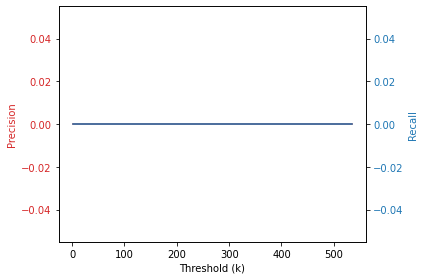

Graph for document 1


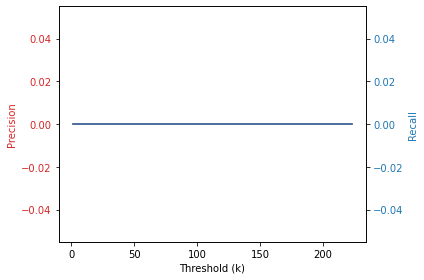

Graph for document 2


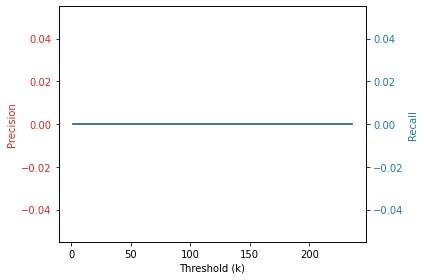

Graph for document 3


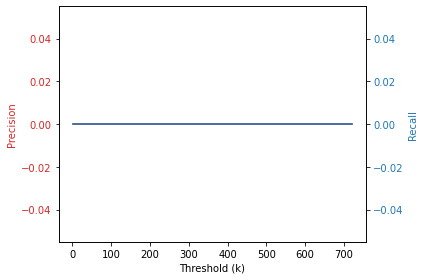

Graph for document 4


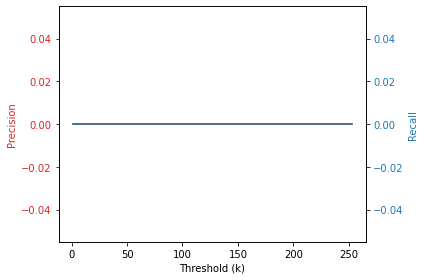

Graph for document 5


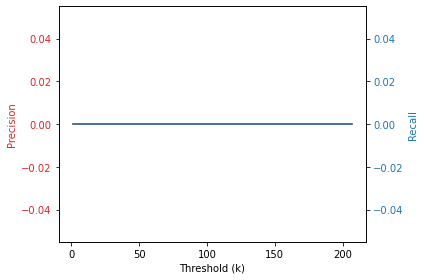

Graph for document 6


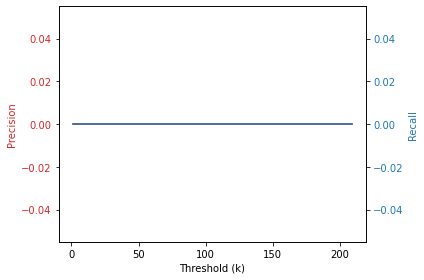

Graph for document 7


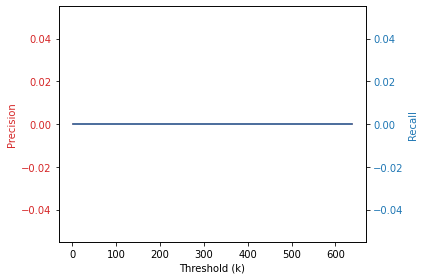

Graph for document 8


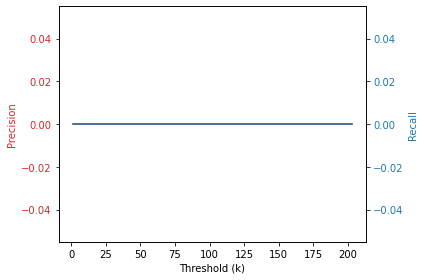

Graph for document 9


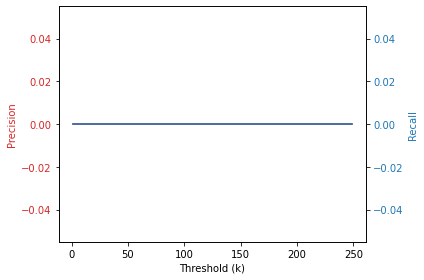

Graph for document 10


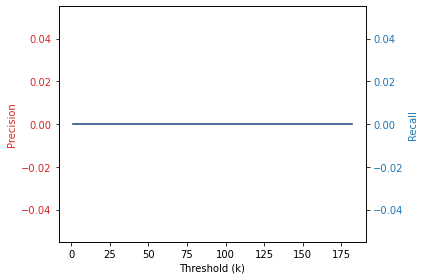

Graph for document 11


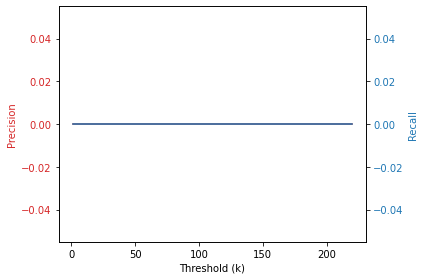

Graph for document 12


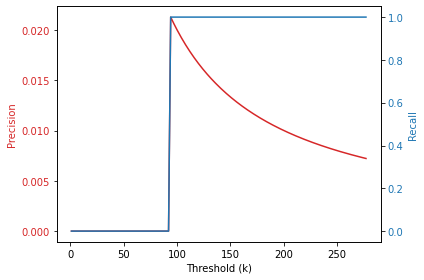

Graph for document 13


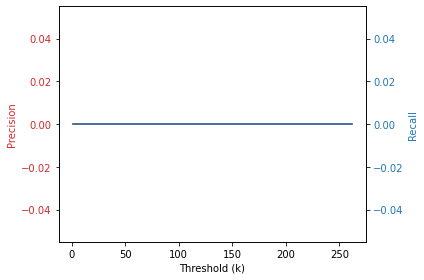

Graph for document 14


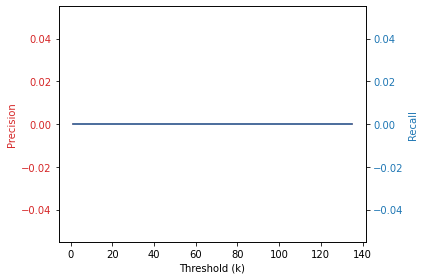

Graph for document 15


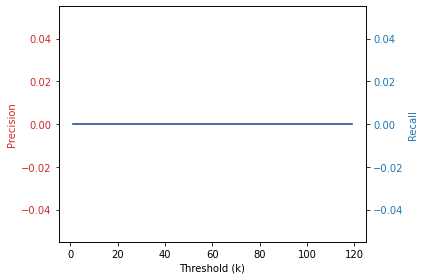

Graph for document 16


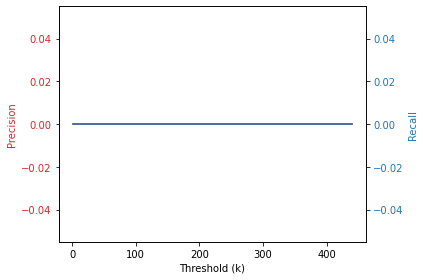

Graph for document 17


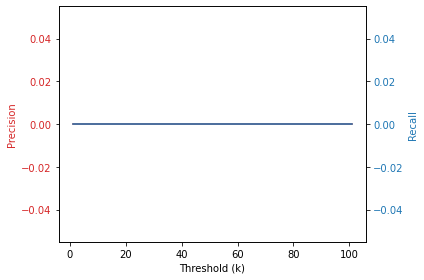

Graph for document 18


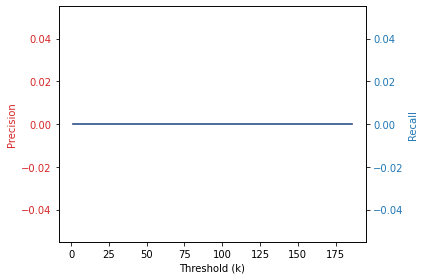

In [82]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [83]:
updated_unique_keyphrases[0]

[('arbeiten im team', 0.9756),
 ('verfassen von publikationen verschriftlichen von ergebnissen', 0.9755),
 ('hohe arbeitsbelastung durch berufliche tätigkeit', 0.9753),
 ('verfahren in konfliktfällen', 0.969),
 ('organisation von tagungen und workshops', 0.9639),
 ('konzipieren von forschungs und erhebungsdesigns', 0.9573),
 ('gesundheitliche probleme', 0.9561),
 ('gute aufstiegsmöglichkeiten', 0.9561),
 ('durchführen von experimenten', 0.9552),
 ('analysieren von daten', 0.9533),
 ('ausüben von verwaltungstätigkeiten', 0.9486),
 ('tätigkeit in einem etablierten betrieb unternehmen', 0.9465),
 ('tätigkeit in einem startup unternehmen', 0.9448),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('fehlende beratungs und unterstützungsangebote', 0.9335),
 ('erheben von daten', 0.9329),
 ('vereinbarkeit von beruf und familie', 0.9303),
 ('ein arbeitstitel', 0.9235),
 ('eine postdocstelle in der wissenschaft', 0.9215),
 ('anleiten von anderen wissenschaftler inne koautor inn en', 0.9204),
 (

In [84]:
check_new = [elem[0] for elem in updated_unique_keyphrases[5]]
len(check_new)

207

In [85]:
keyphrases_within_text[0]

['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf']

In [86]:
list(set(check_new).intersection(keyphrases_within_text[5]))

[]

In [87]:
# check_new.index('promotion') 

In [88]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [89]:
best_recall_indices

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 0, 0, 0, 0, 0, 0]

In [90]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [91]:
best_recall_indices_element

[0.0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 1.0, 0, 0, 0, 0, 0, 0]

# Re-ranking

In [92]:
phrases = []
for i in range(len(updated_unique_keyphrases)):
    phrases.append([])
    for j in range(len(updated_unique_keyphrases[i])):
        phrases[i].append(updated_unique_keyphrases[i][j][0])

In [93]:
phrases[0]

['arbeiten im team',
 'verfassen von publikationen verschriftlichen von ergebnissen',
 'hohe arbeitsbelastung durch berufliche tätigkeit',
 'verfahren in konfliktfällen',
 'organisation von tagungen und workshops',
 'konzipieren von forschungs und erhebungsdesigns',
 'gesundheitliche probleme',
 'gute aufstiegsmöglichkeiten',
 'durchführen von experimenten',
 'analysieren von daten',
 'ausüben von verwaltungstätigkeiten',
 'tätigkeit in einem etablierten betrieb unternehmen',
 'tätigkeit in einem startup unternehmen',
 'mangelnde fremdsprachenkenntnisse',
 'fehlende beratungs und unterstützungsangebote',
 'erheben von daten',
 'vereinbarkeit von beruf und familie',
 'ein arbeitstitel',
 'eine postdocstelle in der wissenschaft',
 'anleiten von anderen wissenschaftler inne koautor inn en',
 'die finanzierung von publikationen',
 'teaching professionals',
 'zeitliche ressourcen freiräume zum promovieren',
 'kulturelle schwierigkeiten',
 'schwierigkeiten finanzierung für mobilität oder for

In [94]:
import pickle
with open('/home/pawan/KeyBert/Thesaurus_lists/thesoz_thesauri.pkl', 'rb') as f:  # keyphrase_similarity_thesaurus_ELSST_thesauri
    newlist_thesaurus = pickle.load(f)

In [95]:
newlist_thesaurus

['APEC',
 'Kirchenaustritt',
 'Kompetenzbewertung ',
 'Sterbetafel ',
 'Massengesellschaft',
 'Leichtlohngruppe',
 'Hilfsarbeiter ',
 'EGB ',
 'psychische Behinderung ',
 'Ausbildungsträger ',
 'Organisationsstruktur',
 'ALLBUS',
 'protestantische Soziallehre',
 'Deutschlandfrage',
 'Nationalfeiertag ',
 'Grenznutzen',
 ' Ernährung',
 'Geldwirtschaft',
 ' englische Sprache',
 'Staatshaushalt ',
 'Manipulation',
 'Schwarzmarkt',
 'Rundfunkjournalismus ',
 'Rheinbund',
 'Luft- und Raumfahrtindustrie ',
 'Verkehrserschließung',
 ' Hausbesetzung',
 'Einkommensdisparität ',
 'Wirtschaftsunternehmen ',
 'Kommunalentwicklung ',
 ' Überstunden',
 'Parteienfinanzierung ',
 'Körperbehinderter ',
 ' Strafentlassung',
 'formale Logik',
 'Verschwendung',
 'Ontogenese',
 'Gentechnologie',
 'Standort',
 'Sonntagsarbeit ',
 'Makler',
 'Arbeiterselbstverwaltung',
 ' Rechtsgrundlage',
 ' politischer Prozess',
 ' Nordkorea',
 'Gentrifizierung',
 'Sombart, Werner',
 'Gewinn- und Verlustrechnung',
 'Wirtsc

In [96]:
#lowercase thesaurus words
new_thesaurus_list = []
for item in newlist_thesaurus:
    new_thesaurus_list.append(item.lower())

In [97]:
new_thesaurus_list

['apec',
 'kirchenaustritt',
 'kompetenzbewertung ',
 'sterbetafel ',
 'massengesellschaft',
 'leichtlohngruppe',
 'hilfsarbeiter ',
 'egb ',
 'psychische behinderung ',
 'ausbildungsträger ',
 'organisationsstruktur',
 'allbus',
 'protestantische soziallehre',
 'deutschlandfrage',
 'nationalfeiertag ',
 'grenznutzen',
 ' ernährung',
 'geldwirtschaft',
 ' englische sprache',
 'staatshaushalt ',
 'manipulation',
 'schwarzmarkt',
 'rundfunkjournalismus ',
 'rheinbund',
 'luft- und raumfahrtindustrie ',
 'verkehrserschließung',
 ' hausbesetzung',
 'einkommensdisparität ',
 'wirtschaftsunternehmen ',
 'kommunalentwicklung ',
 ' überstunden',
 'parteienfinanzierung ',
 'körperbehinderter ',
 ' strafentlassung',
 'formale logik',
 'verschwendung',
 'ontogenese',
 'gentechnologie',
 'standort',
 'sonntagsarbeit ',
 'makler',
 'arbeiterselbstverwaltung',
 ' rechtsgrundlage',
 ' politischer prozess',
 ' nordkorea',
 'gentrifizierung',
 'sombart, werner',
 'gewinn- und verlustrechnung',
 'wirtsc

In [98]:
# optimization.
for i in range(len(new_thesaurus_list)):
    stripped_new_thesaurus_list = [s.strip() for s in new_thesaurus_list]

In [99]:
stripped_new_thesaurus_list

['apec',
 'kirchenaustritt',
 'kompetenzbewertung',
 'sterbetafel',
 'massengesellschaft',
 'leichtlohngruppe',
 'hilfsarbeiter',
 'egb',
 'psychische behinderung',
 'ausbildungsträger',
 'organisationsstruktur',
 'allbus',
 'protestantische soziallehre',
 'deutschlandfrage',
 'nationalfeiertag',
 'grenznutzen',
 'ernährung',
 'geldwirtschaft',
 'englische sprache',
 'staatshaushalt',
 'manipulation',
 'schwarzmarkt',
 'rundfunkjournalismus',
 'rheinbund',
 'luft- und raumfahrtindustrie',
 'verkehrserschließung',
 'hausbesetzung',
 'einkommensdisparität',
 'wirtschaftsunternehmen',
 'kommunalentwicklung',
 'überstunden',
 'parteienfinanzierung',
 'körperbehinderter',
 'strafentlassung',
 'formale logik',
 'verschwendung',
 'ontogenese',
 'gentechnologie',
 'standort',
 'sonntagsarbeit',
 'makler',
 'arbeiterselbstverwaltung',
 'rechtsgrundlage',
 'politischer prozess',
 'nordkorea',
 'gentrifizierung',
 'sombart, werner',
 'gewinn- und verlustrechnung',
 'wirtschaftsdemokratie',
 'regi

In [100]:
# with open('test2.txt', 'w') as f:
#     for line in stripped_new_thesaurus_list:
#         f.write(f"{line}\n")

In [101]:
import pickle
with open('Similarity_thesaurus_and_keybert_keyphrases/keyphrase_similarity_thesaurus_THESOZ.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [102]:
mynewlist[0]

[(5745, tensor(0.9298)),
 (618, tensor(0.6700)),
 (6506, tensor(0.7350)),
 (514, tensor(0.7066)),
 (1941, tensor(0.7008)),
 (12538, tensor(0.8207)),
 (113, tensor(0.8413)),
 (4155, tensor(0.6301)),
 (7368, tensor(0.7502)),
 (9757, tensor(0.7995)),
 (358, tensor(0.7832)),
 (13697, tensor(0.7409)),
 (5538, tensor(0.7827)),
 (12749, tensor(0.6765)),
 (4561, tensor(0.6535)),
 (6686, tensor(0.8146)),
 (5117, tensor(0.9725)),
 (5919, tensor(0.7402)),
 (14972, tensor(0.8157)),
 (9740, tensor(0.7487)),
 (7931, tensor(0.4753)),
 (7606, tensor(0.7806)),
 (5540, tensor(0.6056)),
 (137, tensor(0.6831)),
 (11890, tensor(0.5264)),
 (7770, tensor(0.6185)),
 (9379, tensor(0.7828)),
 (4601, tensor(0.8824)),
 (2871, tensor(0.8092)),
 (8966, tensor(0.7513)),
 (7368, tensor(0.9039)),
 (13077, tensor(0.7135)),
 (13649, tensor(0.7576)),
 (11326, tensor(0.6206)),
 (5246, tensor(0.6191)),
 (1541, tensor(0.6112)),
 (11201, tensor(0.5474)),
 (5117, tensor(0.7234)),
 (1378, tensor(0.6358)),
 (11873, tensor(0.709

Mapped keyphrases with their similairty values

In [103]:
mapped_keyphrases = []
for i in range(len(mynewlist)):
    mapped_keyphrases.append([])
    for j in range(len(mynewlist[i])):
        keyphrase_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = mynewlist[i][j][1]
        mapped_keyphrases[i].append(((keyphrase_main,thesaurus_word,similarity_value)))

In [171]:
mapped_keyphrases[1]

[('vereinbarkeit von lernen und familie',
  'lehrer-schüler-beziehung',
  tensor(0.7359)),
 ('vereinbarkeit von lernen und erwerbsarbeit jobs',
  'arbeitsförderung',
  tensor(0.7359)),
 ('das anforderungsniveau im studienvorbereitungskurs',
  'ausbildungsberatung',
  tensor(0.7169)),
 ('das sprachliche niveau', 'sprachliche intelligenz', tensor(0.8081)),
 ('der umgang mit der ausländerbehörde',
  'ausländerbeauftragter',
  tensor(0.7371)),
 ('das anforderungsniveau im zurückliegenden studienvorbereitungskurs',
  'studienanforderung',
  tensor(0.6531)),
 ('das fachliche niveau', 'berufliche qualifikation', tensor(0.6960)),
 ('informationen über das studium und universitätssystem in deutschland',
  'deutscher akademischer austauschdienst',
  tensor(0.7802)),
 ('bezüge zwischen theorie und praxis', 'theorie-praxis', tensor(0.7874)),
 ('prüfungen in kurzer zeit', 'prüfungsvorbereitung', tensor(0.5760)),
 ('wissenschaftliche texte', 'wissenschaftliche literatur', tensor(0.9445)),
 ('später 

In [105]:
updated_unique_keyphrases[0]

[('arbeiten im team', 0.9756),
 ('verfassen von publikationen verschriftlichen von ergebnissen', 0.9755),
 ('hohe arbeitsbelastung durch berufliche tätigkeit', 0.9753),
 ('verfahren in konfliktfällen', 0.969),
 ('organisation von tagungen und workshops', 0.9639),
 ('konzipieren von forschungs und erhebungsdesigns', 0.9573),
 ('gesundheitliche probleme', 0.9561),
 ('gute aufstiegsmöglichkeiten', 0.9561),
 ('durchführen von experimenten', 0.9552),
 ('analysieren von daten', 0.9533),
 ('ausüben von verwaltungstätigkeiten', 0.9486),
 ('tätigkeit in einem etablierten betrieb unternehmen', 0.9465),
 ('tätigkeit in einem startup unternehmen', 0.9448),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('fehlende beratungs und unterstützungsangebote', 0.9335),
 ('erheben von daten', 0.9329),
 ('vereinbarkeit von beruf und familie', 0.9303),
 ('ein arbeitstitel', 0.9235),
 ('eine postdocstelle in der wissenschaft', 0.9215),
 ('anleiten von anderen wissenschaftler inne koautor inn en', 0.9204),
 (

In [106]:
sorted_mapped_keyphrases = []
for i in range(len(mapped_keyphrases)):
    sorted_mapped_keyphrases.append(sorted(mapped_keyphrases[i], key=lambda tup: tup[2], reverse=True))

In [172]:
sorted_mapped_keyphrases[1]

[('aussage', 'aussage', tensor(1.0000)),
 ('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('muttersprache', 'muttersprache', tensor(1.0000)),
 ('team', 'team', tensor(1.0000)),
 ('schulabschluss', 'schulabschluss', tensor(1.0000)),
 ('abitur', 'abitur', tensor(1.0000)),
 ('deutschland', 'deutschland', tensor(1.0000)),
 ('bachelor', 'bachelor', tensor(1.0000)),
 ('familie', 'familie', tensor(1.0000)),
 ('studium', 'studium', tensor(1.0000)),
 ('krankheit', 'krankheit', tensor(1.)),
 ('land', 'land', tensor(1.)),
 ('wohnen', 'wohnen', tensor(1.0000)),
 ('teamarbeit', 'teamarbeit', tensor(1.0000)),
 ('stadt', 'stadt', tensor(1.0000)),
 ('einrichtung', 'einrichtung', tensor(1.0000)),
 ('situation', 'situation', tensor(1.0000)),
 ('finanzierung', 'finanzierung', tensor(1.0000)),
 ('leistungsdruck', 'leistungsdruck', tensor(1.0000)),
 ('alternative', 'alternative', tensor(1.0000)),
 ('master', 'master', tensor(1.0000)),
 ('meinung', 'meinung', tensor(1.0000)),
 ('stipendium'

**Baseline**  - Adding keybert relevance score and the cosine similarities values(between keybert keyphrases and theasurus keywords)

In [108]:
mapped_keyphrases_baseline = []
for i in range(len(mynewlist)):
    mapped_keyphrases_baseline.append([])
    for j in range(len(mynewlist[i])):
        keyphrase_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = mynewlist[i][j][1]+ updated_unique_keyphrases[i][j][1]
        mapped_keyphrases_baseline[i].append(((keyphrase_main,thesaurus_word,similarity_value)))

In [109]:
mapped_keyphrases_baseline[0]

[('arbeiten im team', 'teamarbeit', tensor(1.9054)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.6455)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.7103)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.6756)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.6647)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.7780)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.7974)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.5862)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.7054)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.7528)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.7318)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.6874)),
 ('tätigkeit in ei

In [110]:
sorted_mapped_keyphrases_baseline = []
for i in range(len(mapped_keyphrases_baseline)):
    sorted_mapped_keyphrases_baseline.append(sorted(mapped_keyphrases_baseline[i], key=lambda tup: tup[2], reverse=True))

In [111]:
sorted_mapped_keyphrases_baseline[0]

[('arbeiten im team', 'teamarbeit', tensor(1.9054)),
 ('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(1.9028)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.7974)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.7922)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.7818)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.7780)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.7528)),
 ('erheben von daten', 'informationsverwertung', tensor(1.7475)),
 ('eine postdocstelle in der wissenschaft',
  'wissenschaftsbetrieb',
  tensor(1.7372)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.7318)),
 ('tätigkeit in einem startup unternehmen',
  'unternehmensgründung',
  tensor(1.7275)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.7103)),
 ('selbstständigkeit als freiberufler',
  'b

# Scenario 1:
__Case 1__:  Change thesaurus, Keybert will be as it is.
considering standard deviation

giving more importance to thesaurus


In [112]:
Case_1 = []
for i in range(len(mynewlist)):
    Case_1.append([])
    x = 1 + np.std(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (x *mynewlist[i][j][1])+ updated_unique_keyphrases[i][j][1]
        Case_1[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [113]:
Case_1[0]

[('arbeiten im team', 'teamarbeit', tensor(2.0288)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.7344)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.8078)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.7693)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.7576)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.8869)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.9090)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.6698)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.8050)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.8589)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.8357)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.7857)),
 ('tätigkeit in ei

In [114]:
sorted_Case_1 = []
for i in range(len(Case_1)):
    sorted_Case_1.append(sorted(Case_1[i], key=lambda tup: tup[2], reverse=True))

In [115]:
sorted_Case_1[0]

[('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(2.0318)),
 ('arbeiten im team', 'teamarbeit', tensor(2.0288)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.9121)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.9090)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.8988)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.8869)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.8589)),
 ('erheben von daten', 'informationsverwertung', tensor(1.8556)),
 ('eine postdocstelle in der wissenschaft',
  'wissenschaftsbetrieb',
  tensor(1.8454)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.8357)),
 ('tätigkeit in einem startup unternehmen',
  'unternehmensgründung',
  tensor(1.8313)),
 ('selbstständigkeit als freiberufler',
  'berufliche selbständigkeit',
  tensor(1.8147)),
 ('hohe arbeitsbelastung durch berufliche täti

# Scenario 1:
__Case 2__:  Change thesaurus, Keybert will be as it is.
considering average

giving more importance to keybert

In [116]:
Case_2 = []
for i in range(len(mynewlist)):
    Case_2.append([])
    x = np.mean(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (x *mynewlist[i][j][1])+ updated_unique_keyphrases[i][j][1]
        Case_2[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [117]:
Case_2[0]

[('arbeiten im team', 'teamarbeit', tensor(1.6819)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.4844)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.5336)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.5057)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.4962)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.5807)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.5951)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.4347)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.5250)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.5606)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.5435)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.5093)),
 ('tätigkeit in ei

In [118]:
sorted_Case_2 = []
for i in range(len(Case_2)):
    sorted_Case_2.append(sorted(Case_2[i], key=lambda tup: tup[2], reverse=True))

In [119]:
sorted_Case_2[0]

[('arbeiten im team', 'teamarbeit', tensor(1.6819)),
 ('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(1.6690)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.5951)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.5807)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.5748)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.5696)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.5606)),
 ('erheben von daten', 'informationsverwertung', tensor(1.5516)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.5435)),
 ('eine postdocstelle in der wissenschaft',
  'wissenschaftsbetrieb',
  tensor(1.5411)),
 ('tätigkeit in einem startup unternehmen',
  'unternehmensgründung',
  tensor(1.5393)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.5336)),
 ('durchführen von experimenten', 'forschung

# Scenario 2:
__Case 1__:  thesaurus constant , Keybert will change.

giving more importance to keybert.


In [120]:
Case_1_new = []
for i in range(len(mynewlist)):
    Case_1_new.append([])
    x = 1 + np.std(list(tup[1] for tup in updated_unique_keyphrases[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (mynewlist[i][j][1])+ (x*updated_unique_keyphrases[i][j][1])
        Case_1_new[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [121]:
Case_1_new[0]

[('arbeiten im team', 'teamarbeit', tensor(2.1609)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.9009)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.9657)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.9293)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.9171)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(2.0287)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(2.0478)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.8366)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.9556)),
 ('analysieren von daten', 'datenspeicherung', tensor(2.0025)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.9802)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.9353)),
 ('tätigkeit in ei

In [122]:
sorted_Case_1_new = []
for i in range(len(Case_1_new)):
    sorted_Case_1_new.append(sorted(Case_1_new[i], key=lambda tup: tup[2], reverse=True))

In [123]:
sorted_Case_1_new[0]

[('arbeiten im team', 'teamarbeit', tensor(2.1609)),
 ('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(2.1464)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(2.0478)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(2.0287)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(2.0248)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(2.0173)),
 ('analysieren von daten', 'datenspeicherung', tensor(2.0025)),
 ('erheben von daten', 'informationsverwertung', tensor(1.9918)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.9802)),
 ('eine postdocstelle in der wissenschaft',
  'wissenschaftsbetrieb',
  tensor(1.9785)),
 ('tätigkeit in einem startup unternehmen',
  'unternehmensgründung',
  tensor(1.9749)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.9657)),
 ('durchführen von experimenten', 'forschung

# Scenario 2:
__Case 2__:  thesaurus constant , Keybert will change.

giving more importance to thesaurus.

In [124]:
Case_2_new = []
for i in range(len(mynewlist)):
    Case_2_new.append([])
    x = np.mean(list(tup[1] for tup in updated_unique_keyphrases[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (mynewlist[i][j][1])+ (x*updated_unique_keyphrases[i][j][1])
        Case_2_new[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [125]:
Case_2_new[0]

[('arbeiten im team', 'teamarbeit', tensor(1.3314)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.0715)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.1365)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.1054)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.0975)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.2147)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.2348)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.0236)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.1434)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.1919)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.1737)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.1305)),
 ('tätigkeit in ei

In [126]:
sorted_Case_2_new = []
for i in range(len(Case_2_new)):
    sorted_Case_2_new.append(sorted(Case_2_new[i], key=lambda tup: tup[2], reverse=True))

In [127]:
sorted_Case_2_new[0]

[('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(1.3554)),
 ('arbeiten im team', 'teamarbeit', tensor(1.3314)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.2695)),
 ('berufliche qualifikation', 'berufliche qualifikation', tensor(1.2607)),
 ('finanzielle situation', 'finanzielle situation', tensor(1.2591)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.2526)),
 ('wissenschaftlichen fortschritt',
  'wissenschaftlicher fortschritt',
  tensor(1.2478)),
 ('wissenschaftler', 'wissenschaftler', tensor(1.2412)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.2348)),
 ('eine fachhochschule', 'fachhochschule', tensor(1.2344)),
 ('wissenschaftliche mitarbeiter',
  'wissenschaftlicher mitarbeiter',
  tensor(1.2299)),
 ('schreiben', 'schreiben', tensor(1.2281)),
 ('spiel', 'spiel', tensor(1.2257)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.2147))

# Scenario 3:
thesaurus change , Keybert will change.

giving weightage to thesaurus and Keybert .


**Case 1:** importance to keybert

In [128]:
Scenario_3_a = []
for i in range(len(mynewlist)):
    Scenario_3_a.append([])
    x = 1 + np.std(list(tup[1] for tup in updated_unique_keyphrases[i])) #keybert
    y = np.mean(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyphrases[i][j][1])
        Scenario_3_a[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [129]:
Scenario_3_a[0]

[('arbeiten im team', 'teamarbeit', tensor(1.9373)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.7398)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.7890)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.7594)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.7486)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.8314)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.8455)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.6851)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.7752)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.8102)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.7919)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.7571)),
 ('tätigkeit in ei

In [130]:
sorted_Scenario_3_a = []
for i in range(len(Scenario_3_a)):
    sorted_Scenario_3_a.append(sorted(Scenario_3_a[i], key=lambda tup: tup[2], reverse=True))

In [131]:
sorted_Scenario_3_a[0]

[('arbeiten im team', 'teamarbeit', tensor(1.9373)),
 ('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(1.9126)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.8455)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.8314)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.8102)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.8075)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.8051)),
 ('erheben von daten', 'informationsverwertung', tensor(1.7959)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.7919)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.7890)),
 ('tätigkeit in einem startup unternehmen',
  'unternehmensgründung',
  tensor(1.7867)),
 ('eine postdocstelle in der wissenschaft',
  'wissenschaftsbetrieb',
  tensor(1.7824)),
 ('durchführen von experimenten', 'forschung

**Case 2:** importance to thesaurus

In [132]:
Scenario_3_b = []
for i in range(len(mynewlist)):
    Scenario_3_b.append([])
    x = np.mean(list(tup[1] for tup in updated_unique_keyphrases[i])) #keybert
    y = 1 + np.std(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyphrases[i][j][1])
        Scenario_3_b[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [133]:
Scenario_3_b[0]

[('arbeiten im team', 'teamarbeit', tensor(1.4547)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.1604)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(1.2340)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(1.1991)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(1.1905)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.3236)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.3464)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.1072)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(1.2429)),
 ('analysieren von daten', 'datenspeicherung', tensor(1.2980)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(1.2776)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(1.2288)),
 ('tätigkeit in ei

In [134]:
sorted_Scenario_3_b = []
for i in range(len(Scenario_3_b)):
    sorted_Scenario_3_b.append(sorted(Scenario_3_b[i], key=lambda tup: tup[2], reverse=True))

In [135]:
sorted_Scenario_3_b[0]

[('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(1.4844)),
 ('arbeiten im team', 'teamarbeit', tensor(1.4547)),
 ('berufliche qualifikation', 'berufliche qualifikation', tensor(1.3933)),
 ('finanzielle situation', 'finanzielle situation', tensor(1.3917)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.3894)),
 ('wissenschaftlichen fortschritt',
  'wissenschaftlicher fortschritt',
  tensor(1.3786)),
 ('wissenschaftler', 'wissenschaftler', tensor(1.3738)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.3696)),
 ('schreiben', 'schreiben', tensor(1.3608)),
 ('eine fachhochschule', 'fachhochschule', tensor(1.3596)),
 ('wissenschaftliche mitarbeiter',
  'wissenschaftlicher mitarbeiter',
  tensor(1.3591)),
 ('spiel', 'spiel', tensor(1.3584)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.3464)),
 ('der karriereplanung', 'karriereplanung', tensor(1.3247)),
 ('konzipieren von forschungs u

**Case 3:** less weighatge to both

In [136]:
Scenario_3_c = []
for i in range(len(mynewlist)):
    Scenario_3_c.append([])
    x = np.mean(list(tup[1] for tup in updated_unique_keyphrases[i])) #keybert
    y = np.mean(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyphrases[i][j][1])
        Scenario_3_c[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [137]:
Scenario_3_c[0]

[('arbeiten im team', 'teamarbeit', tensor(1.1078)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(0.9104)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(0.9597)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(0.9355)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(0.9290)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.0174)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.0325)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(0.8721)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(0.9630)),
 ('analysieren von daten', 'datenspeicherung', tensor(0.9997)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(0.9853)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(0.9523)),
 ('tätigkeit in ei

In [138]:
sorted_Scenario_3_c = []
for i in range(len(Scenario_3_c)):
    sorted_Scenario_3_c.append(sorted(Scenario_3_c[i], key=lambda tup: tup[2], reverse=True))

In [139]:
sorted_Scenario_3_c[0]

[('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(1.1216)),
 ('arbeiten im team', 'teamarbeit', tensor(1.1078)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(1.0522)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(1.0404)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(1.0325)),
 ('berufliche qualifikation', 'berufliche qualifikation', tensor(1.0202)),
 ('finanzielle situation', 'finanzielle situation', tensor(1.0186)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(1.0174)),
 ('wissenschaftlichen fortschritt',
  'wissenschaftlicher fortschritt',
  tensor(1.0106)),
 ('eine fachhochschule', 'fachhochschule', tensor(1.0075)),
 ('erheben von daten', 'informationsverwertung', tensor(1.0027)),
 ('wissenschaftler', 'wissenschaftler', tensor(1.0007)),
 ('analysieren von daten', 'datenspeicherung', tensor(0.9997)),
 ('eine postdocstelle in der wissenschaf

**Case 4:** more weighatage to both

In [140]:
Scenario_3_d = []
for i in range(len(mynewlist)):
    Scenario_3_d.append([])
    x = 1 + np.std(list(tup[1] for tup in updated_unique_keyphrases[i])) #keybert
    y = 1 + np.std(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyphrases_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyphrases[i][j][1])
        Scenario_3_d[i].append(((keyphrases_main,thesaurus_word,similarity_value)))

In [141]:
Scenario_3_d[0]

[('arbeiten im team', 'teamarbeit', tensor(2.2843)),
 ('verfassen von publikationen verschriftlichen von ergebnissen',
  'literaturdokumentation',
  tensor(1.9898)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(2.0632)),
 ('verfahren in konfliktfällen', 'konfliktmanagement', tensor(2.0230)),
 ('organisation von tagungen und workshops',
  'bildungsveranstaltung',
  tensor(2.0100)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(2.1376)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(2.1594)),
 ('gute aufstiegsmöglichkeiten', 'edutainment', tensor(1.9202)),
 ('durchführen von experimenten', 'forschungsvorhaben', tensor(2.0551)),
 ('analysieren von daten', 'datenspeicherung', tensor(2.1085)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(2.0841)),
 ('tätigkeit in einem etablierten betrieb unternehmen',
  'dienstleistung für unternehmen',
  tensor(2.0336)),
 ('tätigkeit in ei

In [142]:
sorted_Scenario_3_d = []
for i in range(len(Scenario_3_d)):
    sorted_Scenario_3_d.append(sorted(Scenario_3_d[i], key=lambda tup: tup[2], reverse=True))

In [143]:
sorted_Scenario_3_d[0]

[('arbeiten im team', 'teamarbeit', tensor(2.2843)),
 ('vereinbarkeit von beruf und familie',
  'vereinbarkeit von familie und beruf',
  tensor(2.2754)),
 ('gesundheitliche probleme', 'gesundheitliche nachsorge', tensor(2.1594)),
 ('entwickeln von forschungsideen', 'forschungsvorhaben', tensor(2.1447)),
 ('konzipieren von forschungs und erhebungsdesigns',
  'forschungsdesign',
  tensor(2.1376)),
 ('durchführen von lehrveranstaltungen', 'lehrveranstaltung', tensor(2.1343)),
 ('analysieren von daten', 'datenspeicherung', tensor(2.1085)),
 ('erheben von daten', 'informationsverwertung', tensor(2.0999)),
 ('eine postdocstelle in der wissenschaft',
  'wissenschaftsbetrieb',
  tensor(2.0867)),
 ('ausüben von verwaltungstätigkeiten', 'verwaltungsberuf', tensor(2.0841)),
 ('tätigkeit in einem startup unternehmen',
  'unternehmensgründung',
  tensor(2.0787)),
 ('hohe arbeitsbelastung durch berufliche tätigkeit',
  'arbeitspflicht',
  tensor(2.0632)),
 ('durchführen von experimenten', 'forschung

In [144]:
elem = []
for i in range(len(sorted_Scenario_3_d)):
    elem.append([])
    for x, y, z in sorted_Scenario_3_d[i]:
        elem[i].append(y)
        elem[i].append(x)

In [145]:
elem[0]

['teamarbeit',
 'arbeiten im team',
 'vereinbarkeit von familie und beruf',
 'vereinbarkeit von beruf und familie',
 'gesundheitliche nachsorge',
 'gesundheitliche probleme',
 'forschungsvorhaben',
 'entwickeln von forschungsideen',
 'forschungsdesign',
 'konzipieren von forschungs und erhebungsdesigns',
 'lehrveranstaltung',
 'durchführen von lehrveranstaltungen',
 'datenspeicherung',
 'analysieren von daten',
 'informationsverwertung',
 'erheben von daten',
 'wissenschaftsbetrieb',
 'eine postdocstelle in der wissenschaft',
 'verwaltungsberuf',
 'ausüben von verwaltungstätigkeiten',
 'unternehmensgründung',
 'tätigkeit in einem startup unternehmen',
 'arbeitspflicht',
 'hohe arbeitsbelastung durch berufliche tätigkeit',
 'forschungsvorhaben',
 'durchführen von experimenten',
 'berufliche selbständigkeit',
 'selbstständigkeit als freiberufler',
 'unterrichtspraxis',
 'teaching professionals',
 'dienstleistung für unternehmen',
 'tätigkeit in einem etablierten betrieb unternehmen',
 'k

In [146]:
result =[]
for i in range(len(elem)):
    result.append([])
    for item in elem[i]:
        if item not in result[i]:
            result[i].append(item)

In [147]:
result[0]

['teamarbeit',
 'arbeiten im team',
 'vereinbarkeit von familie und beruf',
 'vereinbarkeit von beruf und familie',
 'gesundheitliche nachsorge',
 'gesundheitliche probleme',
 'forschungsvorhaben',
 'entwickeln von forschungsideen',
 'forschungsdesign',
 'konzipieren von forschungs und erhebungsdesigns',
 'lehrveranstaltung',
 'durchführen von lehrveranstaltungen',
 'datenspeicherung',
 'analysieren von daten',
 'informationsverwertung',
 'erheben von daten',
 'wissenschaftsbetrieb',
 'eine postdocstelle in der wissenschaft',
 'verwaltungsberuf',
 'ausüben von verwaltungstätigkeiten',
 'unternehmensgründung',
 'tätigkeit in einem startup unternehmen',
 'arbeitspflicht',
 'hohe arbeitsbelastung durch berufliche tätigkeit',
 'durchführen von experimenten',
 'berufliche selbständigkeit',
 'selbstständigkeit als freiberufler',
 'unterrichtspraxis',
 'teaching professionals',
 'dienstleistung für unternehmen',
 'tätigkeit in einem etablierten betrieb unternehmen',
 'konfliktmanagement',
 'v

In [148]:
predicted_new=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(result)):  
    predicted_new.append([])           #used for nested list
    for j in range(1,int(len(result[i])/chunk_size)+1):
        predicted_new[i].append(([elem for elem in result[i]])[0:j*chunk_size])

In [149]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keyphrases_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keyphrases_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [150]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [151]:
eval_values_new = []
for i in range(len(predicted_new)):
    eval_values_new.append([]) 
    for j in range(len(predicted_new[i])):
        eval_values_new[i].append(evaluate_keywords(predicted_new[i][j], keyphrases_within_text[i]))

In [152]:
eval_values_new[0]

[(0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.3333333333333333, 0.5, 0.4),
 (0.25, 0.5, 0.3333333333333333),
 (0.2, 0.5, 0.28571428571428575),
 (0.16666666666666666, 0.5, 0.25),
 (0.14285714285714285, 0.5, 0.22222222222222224),
 (0.125, 0.5, 0.2),
 (0.1111111111111111, 0.5, 0.1818181818181818),
 (0.1, 0.5, 0.16666666666666669),
 (0.09090909090909091, 0.5, 0.15384615384615385),
 (0.08333333333333333, 0.5, 0.14285714285714285),
 (0.07692307692307693, 0.5, 0.13333333333333336),
 (0.07142857142857142, 0.5, 0.125),
 (0.06666666666666667, 0.5, 0.11764705882352941),
 (0.0625, 0.5, 0.1111111111111111),
 (0.058823529411764705, 0.5, 0.10526315789473684),
 (0.05555555555555555, 0.5, 0.09999999999999999),
 (0.05263157894736842, 0.5, 0.09523809523809525),
 (0.05, 0.5, 0.09090909090909091),
 (0.047619047619047616, 0.5, 0.08695652173913042),
 (0.045454545454545456, 0.5, 0.08333333333333334),
 (0.043478260869565216, 0.5, 0.08),
 (0.041666666666666664, 0.5, 0.07692307692307693),
 (0.04, 0.5, 0.07407407407407407)

In [153]:
precison_values_new = []
for i in range(len(eval_values_new)):
    precison_values_new.append([])
    for a_tuple in eval_values_new[i]:
        precison_values_new[i].append(a_tuple[0])

In [154]:
recall_values_new = []
for i in range(len(eval_values_new)):
    recall_values_new.append([])
    for a_tuple in eval_values_new[i]:
        recall_values_new[i].append(a_tuple[1])

In [155]:
F1_values_new = []
for i in range(len(eval_values_new)):
    F1_values_new.append([])
    for a_tuple in eval_values_new[i]:
        F1_values_new[i].append(a_tuple[2])

Graph for document 0


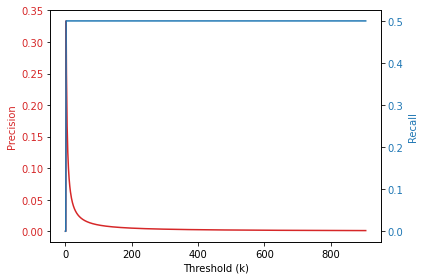

Graph for document 1


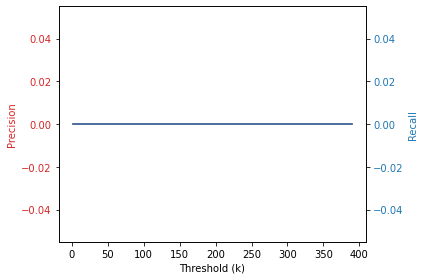

Graph for document 2


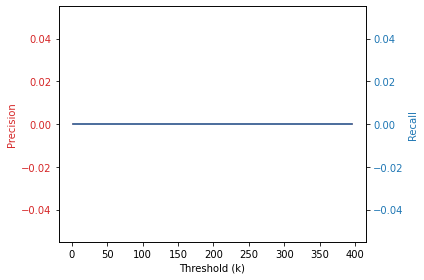

Graph for document 3


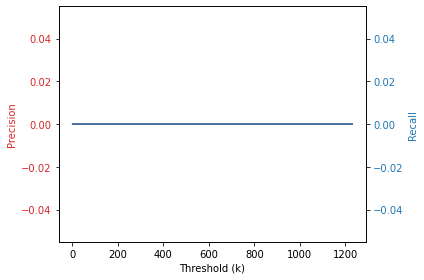

Graph for document 4


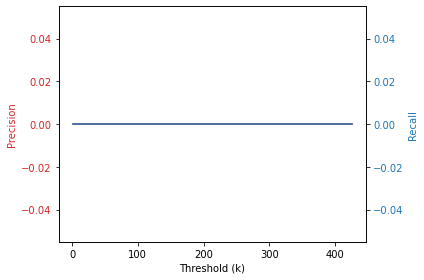

Graph for document 5


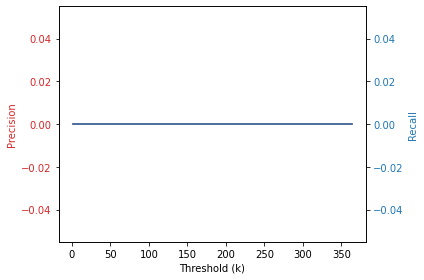

Graph for document 6


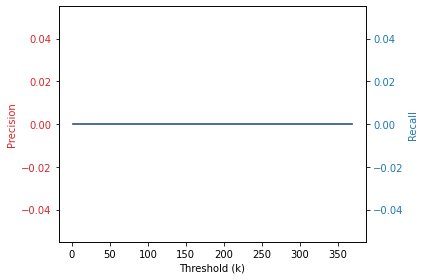

Graph for document 7


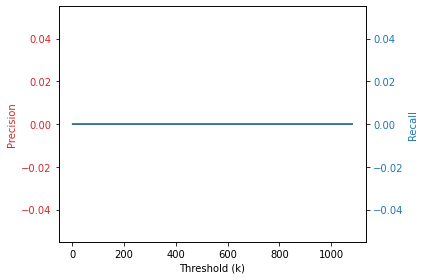

Graph for document 8


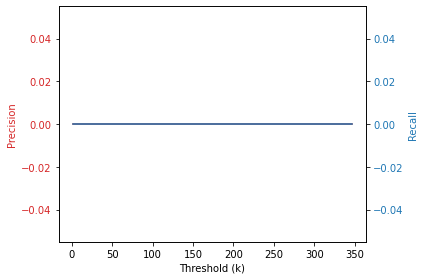

Graph for document 9


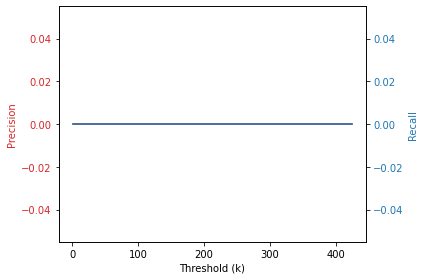

Graph for document 10


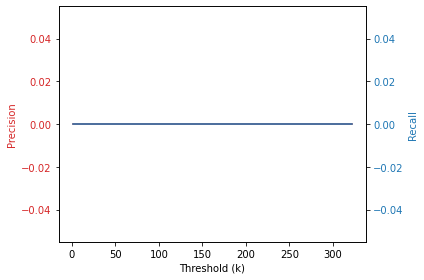

Graph for document 11


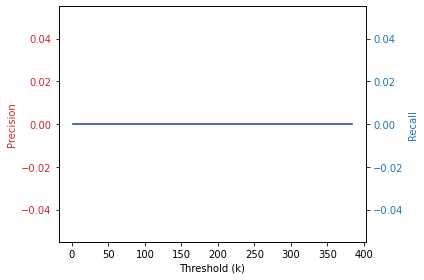

Graph for document 12


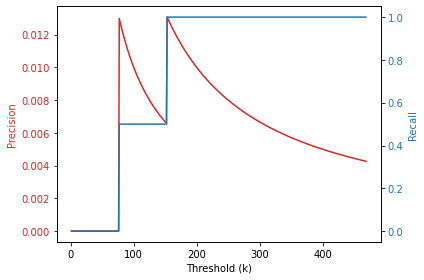

Graph for document 13


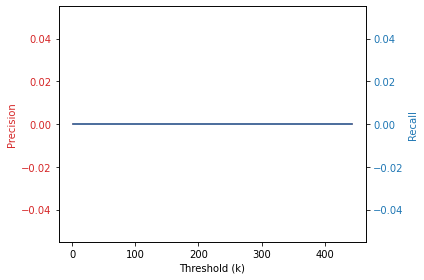

Graph for document 14


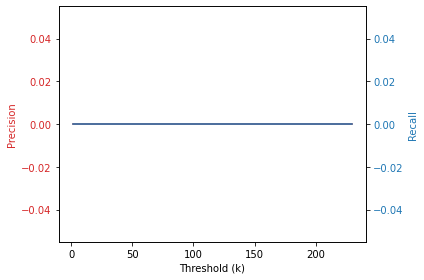

Graph for document 15


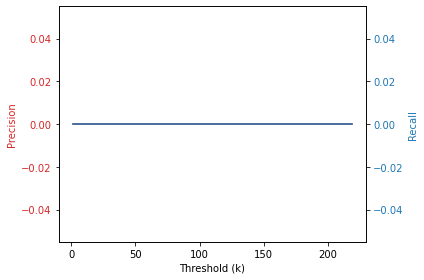

Graph for document 16


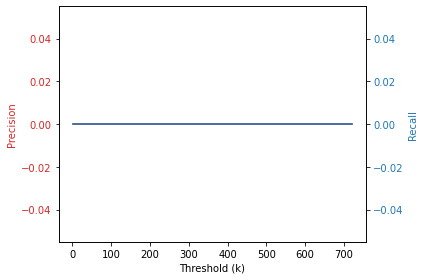

Graph for document 17


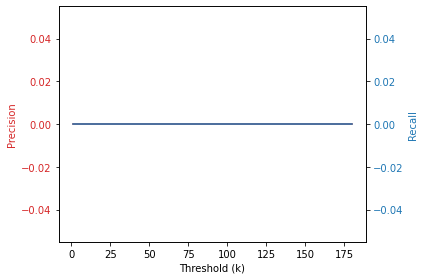

Graph for document 18


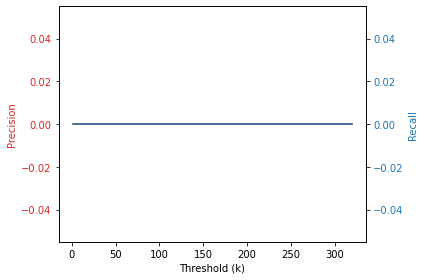

In [156]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values_new)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values_new[i])+1))]
        data1 = precison_values_new[i]
        data2 = recall_values_new[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [157]:
test_new = [elem for elem in result[0]]
len(test_new)

905

In [158]:
test_new

['teamarbeit',
 'arbeiten im team',
 'vereinbarkeit von familie und beruf',
 'vereinbarkeit von beruf und familie',
 'gesundheitliche nachsorge',
 'gesundheitliche probleme',
 'forschungsvorhaben',
 'entwickeln von forschungsideen',
 'forschungsdesign',
 'konzipieren von forschungs und erhebungsdesigns',
 'lehrveranstaltung',
 'durchführen von lehrveranstaltungen',
 'datenspeicherung',
 'analysieren von daten',
 'informationsverwertung',
 'erheben von daten',
 'wissenschaftsbetrieb',
 'eine postdocstelle in der wissenschaft',
 'verwaltungsberuf',
 'ausüben von verwaltungstätigkeiten',
 'unternehmensgründung',
 'tätigkeit in einem startup unternehmen',
 'arbeitspflicht',
 'hohe arbeitsbelastung durch berufliche tätigkeit',
 'durchführen von experimenten',
 'berufliche selbständigkeit',
 'selbstständigkeit als freiberufler',
 'unterrichtspraxis',
 'teaching professionals',
 'dienstleistung für unternehmen',
 'tätigkeit in einem etablierten betrieb unternehmen',
 'konfliktmanagement',
 'v

In [159]:
list(set(test_new).intersection(keyphrases_within_text[0]))

['vereinbarkeit von familie und beruf']

In [160]:
test_new.index('promovierende')

625

In [161]:
recall_indices_best = []
for i in range(len(recall_values_new)):
    recall_indices_best.append(recall_values_new[i].index(max(recall_values_new[i])))

In [162]:
recall_indices_best 

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 152, 0, 0, 0, 0, 0, 0]

In [163]:
precision_indices_best = []
for i in range(len(precison_values_new)):
    precision_indices_best.append(precison_values_new[i].index(max(precison_values_new[i])))

In [164]:
precision_indices_best

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 152, 0, 0, 0, 0, 0, 0]

In [165]:
F1_indices_best = []
for i in range(len(F1_values_new)):
    F1_indices_best.append(F1_values_new[i].index(max(F1_values_new[i])))

In [166]:
F1_indices_best

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 152, 0, 0, 0, 0, 0, 0]

In [167]:
# recall_indices_best 

In [168]:
recall_indices_element_best = []

for i in range(len(recall_indices_best)):
    Recall_values = recall_values_new[i]
    recall_indices_element_best.append(Recall_values[recall_indices_best[i]])

In [169]:
recall_indices_element_best

[0.5, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 1.0, 0, 0, 0, 0, 0, 0]

In [170]:
keyphrases_within_text[0]

['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf']